[View in Colaboratory](https://colab.research.google.com/github/Bing5154/AI4AV/blob/master/Pytorch_Tensor_Graph.ipynb)


# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

## Import the library

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu90' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch  # <Ctrl> / <Shift> + <Return>

In [4]:
torch.__version__

'0.4.0'

## Getting help in Jupyter

In [5]:
torch.sq # <Tab>

AttributeError: ignored

In [0]:
# What about all `*Tensor`s?
torch.*Tensor?

In [4]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [0]:
# Annotate your functions / classes!
torch.nn.Module?

In [0]:
torch.nn.Module??

## Dropping to Bash: magic!

In [0]:
! ls -lh

total 4.0K
drwxr-xr-x 3 root root 4.0K Jul  2 16:56 datalab


In [0]:
%%bash
for f in $(ls *.*); do
    echo $(wc -l $f)
done

ls: cannot access '*.*': No such file or directory


In [0]:
# Help?
%%bash?

In [0]:
# Getting some general help
%magic

## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.
 
See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!

In [10]:
t = torch.Tensor(2, 3, 4)
#torch.Tensor is an alias for the default tensor type (torch.FloatTensor).
type(t)

torch.Tensor

In [11]:
t.size()

torch.Size([2, 3, 4])

In [12]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [13]:
print(f'organised in {t.dim()} sub-dimensions')

organised in 3 sub-dimensions


In [14]:
t

tensor([[[ 5.2849e-36,  0.0000e+00,  0.0000e+00,  1.6244e+19],
         [ 2.6785e-07,  4.5703e-41,  1.6644e-16,  4.5703e-41],
         [ 1.4013e-45,  1.4349e-42,  0.0000e+00,  0.0000e+00]],

        [[ 5.0439e-29,  4.5703e-41,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 2.5353e+30,  9.6690e-44,  1.2812e-20,  2.5353e+30]]])

In [15]:
# Mind the underscore!
t.random_(10)

tensor([[[ 6.,  8.,  1.,  5.],
         [ 9.,  9.,  2.,  1.],
         [ 7.,  1.,  5.,  8.]],

        [[ 9.,  9.,  1.,  7.],
         [ 7.,  8.,  8.,  7.],
         [ 3.,  2.,  3.,  7.]]])

In [16]:
t

tensor([[[ 6.,  8.,  1.,  5.],
         [ 9.,  9.,  2.,  1.],
         [ 7.,  1.,  5.,  8.]],

        [[ 9.,  9.,  1.,  7.],
         [ 7.,  8.,  8.,  7.],
         [ 3.,  2.,  3.,  7.]]])

In [17]:
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[ 6.,  8.,  1.,  5.,  9.,  9.,  2.,  1.],
        [ 7.,  1.,  5.,  8.,  9.,  9.,  1.,  7.],
        [ 7.,  8.,  8.,  7.,  3.,  2.,  3.,  7.]])

In [18]:
r.zero_()

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [22]:
t

tensor([[[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]]])

In [0]:
# This *is* important, sigh...
s = r.clone()

In [24]:
s.fill_(1)
s

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [25]:
r

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Vectors (1D Tensors)

In [26]:
v = torch.Tensor([1, 2, 3, 4]); v

tensor([ 1.,  2.,  3.,  4.])

In [27]:
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [28]:
w = torch.Tensor([1, 0, 2, 0]); w

tensor([ 1.,  0.,  2.,  0.])

In [29]:
# Element-wise multiplication
v * w

tensor([ 1.,  0.,  6.,  0.])

In [30]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [31]:
x = torch.Tensor(5).random_(10); x

tensor([ 3.,  0.,  3.,  8.,  4.])

In [32]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 3.0, last: 4.0


In [33]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([ 0.,  3.])

In [34]:
v

tensor([ 1.,  2.,  3.,  4.])

In [35]:
v = torch.arange(1, 4 + 1); v

tensor([ 1.,  2.,  3.,  4.])

In [36]:
print(v.pow(2), v)

tensor([  1.,   4.,   9.,  16.]) tensor([ 1.,  2.,  3.,  4.])


In [37]:
print(v.pow_(2), v)

tensor([  1.,   4.,   9.,  16.]) tensor([  1.,   4.,   9.,  16.])


## Matrices (2D Tensors)

In [15]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]]); m

tensor([[ 2.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [16]:
m.dim()

2

In [17]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [18]:
#Returns the total number of elements in the input tensor.
m.numel()

8

In [19]:
m[0][2]

tensor(3.)

In [20]:
m[0, 2]

tensor(3.)

In [21]:
m[:, 1]

tensor([ 5.,  2.])

In [22]:
m[:, [1]]

tensor([[ 5.],
        [ 2.]])

In [23]:
m[[0], :]

tensor([[ 2.,  5.,  3.,  7.]])

In [24]:
m[0, :]

tensor([ 2.,  5.,  3.,  7.])

In [25]:
v = torch.arange(1, 4 + 1); v

tensor([ 1.,  2.,  3.,  4.])

In [35]:
m @ v
print(m.size())
print(v.size())

torch.Size([2, 4])
torch.Size([4])


In [27]:
m[[0], :] @ v

tensor([ 49.])

In [28]:
m[[1], :] @ v

tensor([ 47.])

In [29]:
m + torch.rand(2, 4)

tensor([[ 2.3003,  5.7658,  3.5523,  7.3742],
        [ 4.1339,  2.5576,  1.5529,  9.1708]])

In [30]:
m - torch.rand(2, 4)

tensor([[ 1.2585,  4.1292,  2.7148,  6.5454],
        [ 3.9516,  1.5019,  0.2126,  8.7266]])

In [31]:
m * torch.rand(2, 4)

tensor([[ 0.8614,  0.9613,  2.9095,  6.9239],
        [ 0.1884,  1.2310,  0.9757,  4.2724]])

In [32]:
m / torch.rand(2, 4)

tensor([[  3.2162,   7.6830,   3.9918,   7.5706],
        [  6.8367,   2.7500,   1.1894,  10.4253]])

In [33]:
#Expects input to be a matrix (2-D tensor) and transposes dimensions 0 and 1.
m.t()

tensor([[ 2.,  4.],
        [ 5.,  2.],
        [ 3.,  1.],
        [ 7.,  9.]])

In [34]:
# Same as
m.transpose(0, 1)

tensor([[ 2.,  4.],
        [ 5.,  2.],
        [ 3.,  1.],
        [ 7.,  9.]])

## Constructors

In [0]:
torch.arange(3, 8 + 1)


 3
 4
 5
 6
 7
 8
[torch.FloatTensor of size 6]

In [0]:
torch.arange(5.7, -3, -2.1)


 5.7000
 3.6000
 1.5000
-0.6000
-2.7000
[torch.FloatTensor of size 5]

In [0]:
torch.linspace(3, 8, 20).view(1, -1)



Columns 0 to 9 
 3.0000  3.2632  3.5263  3.7895  4.0526  4.3158  4.5789  4.8421  5.1053  5.3684

Columns 10 to 19 
 5.6316  5.8947  6.1579  6.4211  6.6842  6.9474  7.2105  7.4737  7.7368  8.0000
[torch.FloatTensor of size 1x20]

In [0]:
torch.zeros(3, 5)


 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
[torch.FloatTensor of size 3x5]

In [0]:
torch.ones(3, 2, 5)


(0 ,.,.) = 
  1  1  1  1  1
  1  1  1  1  1

(1 ,.,.) = 
  1  1  1  1  1
  1  1  1  1  1

(2 ,.,.) = 
  1  1  1  1  1
  1  1  1  1  1
[torch.FloatTensor of size 3x2x5]

In [0]:
torch.eye(3)


 1  0  0
 0  1  0
 0  0  1
[torch.FloatTensor of size 3x3]

In [0]:
# Pretty plotting config
%run ~/Dropbox/NYU/Work/plot_conf.py

In [0]:
# Pretty plotting config
%run ~/Dropbox/NYU/Work/plot_conf.py

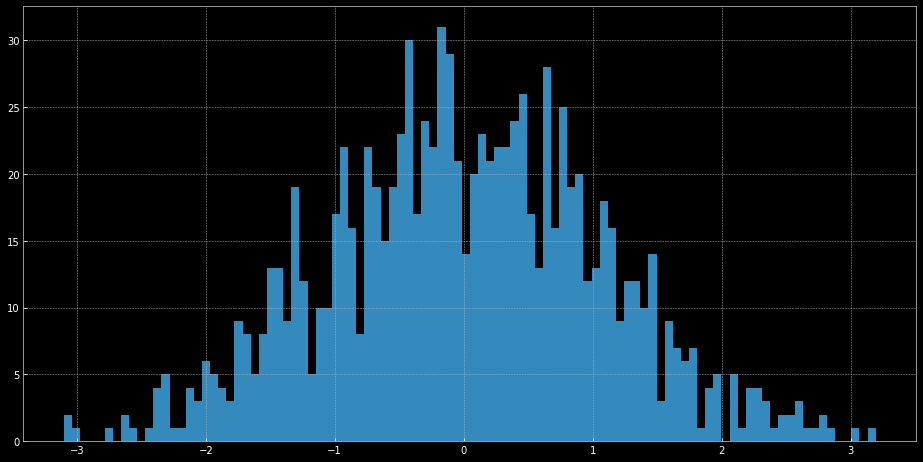

In [0]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

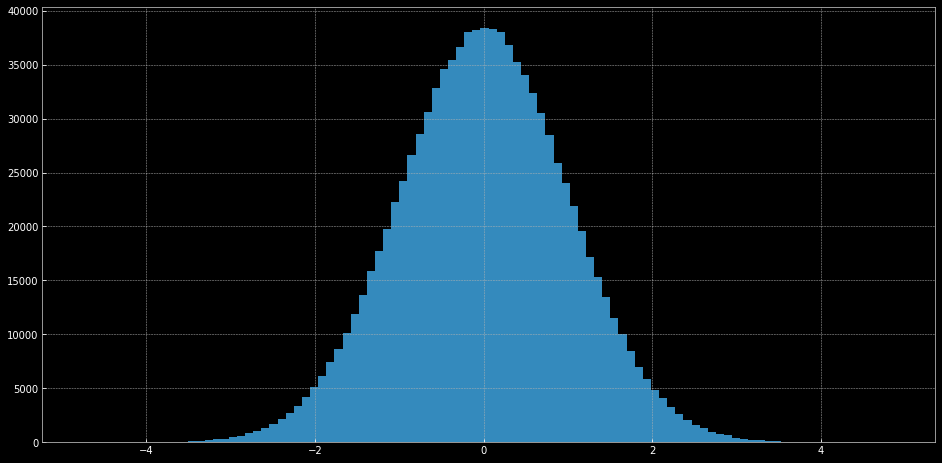

In [0]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

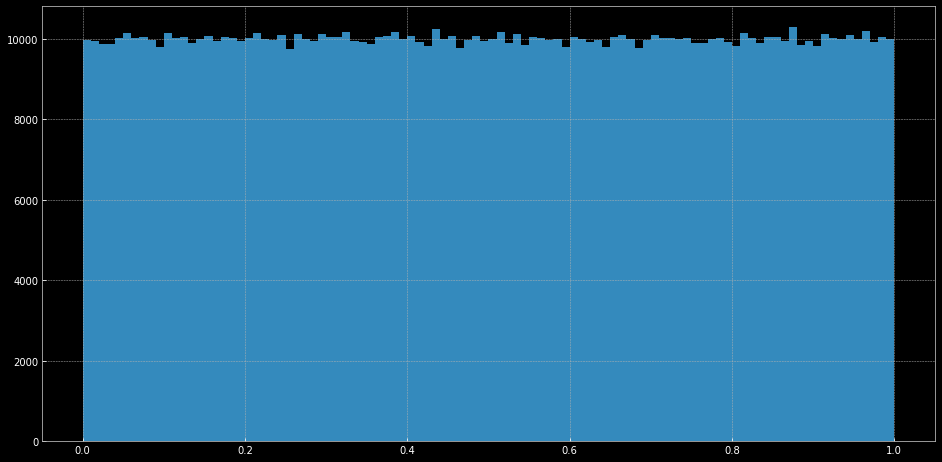

In [0]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [0]:
torch.*Tensor?

In [3]:
m

NameError: ignored

In [7]:
m.double()

tensor([[ 2.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]], dtype=torch.float64)

In [8]:
m.byte()

tensor([[ 2,  5,  3,  7],
        [ 4,  2,  1,  9]], dtype=torch.uint8)

In [9]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
m.to(device)

tensor([[ 2.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]], device='cuda:0')

In [10]:
m_np = m.numpy(); m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [11]:
m_np[0, 0] = -1; m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [12]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [13]:
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

NameError: ignored

In [0]:
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## More fun

In [0]:
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a, b)


 1  2  3  4
[torch.FloatTensor of size 1x4]
 
 5  6  7  8
[torch.FloatTensor of size 1x4]



In [0]:
#Concatenates the given sequence of seq tensors in the given dimension
torch.cat((a, b), 0)


 1  2  3  4
 5  6  7  8
[torch.FloatTensor of size 2x4]

In [0]:
torch.cat((a, b), 1)


    1     2     3     4     5     6     7     8
[torch.FloatTensor of size 1x8]

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](http://pytorch.org/docs/0.3.0/torch.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.